In [1]:
# generate random data matrix
n,d = 6,4
X = randn(n,d)

# optional: give it linearly dependent columns
# X[:,3] = X[:,2]

6x4 Array{Float64,2}:
  0.0132785  -0.984396  -0.918335   1.46553  
 -0.183541    0.873455   0.526415  -0.0876344
  1.52736     1.22576    0.519789  -0.54848  
  0.48072     0.3683    -0.328003   0.175614 
 -0.608484   -0.922596   0.337617   0.137952 
 -0.110241   -1.71931   -0.845966   0.269379 

In [2]:
# form data from noisy linear model
w♮ = randn(d)
y = X*w♮ + .1*randn(n);

In [3]:
# look at least squares objective as a function of w
f(w) = norm(y - X*w)^2 # least squares

f (generic function with 1 method)

In [4]:
using PyPlot

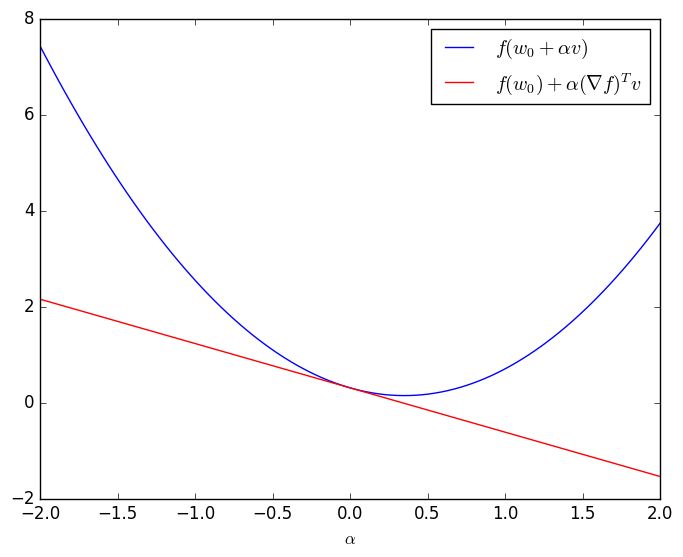

PyObject <matplotlib.legend.Legend object at 0x000000001D96A400>

In [5]:
# gradient at w0 approximates f(w) near w0
w0 = randn(d)
v = randn(d)
alphas = linspace(-2,2,100) #100 samples to generate
∇f = 2X'*X*w0 - 2X'*y
plot(alphas, [f(w0 + alpha*v) for alpha in alphas], label=L"$f(w_0 + \alpha v)$") #latex string
plot(alphas, [f(w0) + alpha*dot(∇f, v) for alpha in alphas], "r", label=L"$f(w_0) + \alpha (\nabla f)^T v$")
xlabel(L"$\alpha$")
legend()

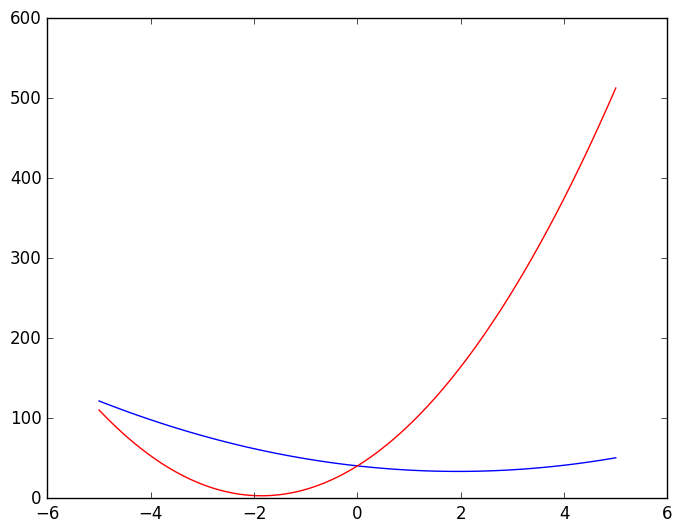

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001B4B0EB8>

In [6]:
# function decreases fastest in the -∇f(w) direction
w0 = randn(d)
v = randn(d)
∇f = 2X'*X*w0 - 2X'*y
v_normalized = v/norm(v) #Make it unit length
∇f_normalized = ∇f/norm(∇f)
alphas = linspace(-5,5,100)
plot(alphas, [f(w0 + alpha*v_normalized) for alpha in alphas])
plot(alphas, [f(w0 + alpha*∇f_normalized) for alpha in alphas],"r")
#Red curve goes down faster than the blue curve

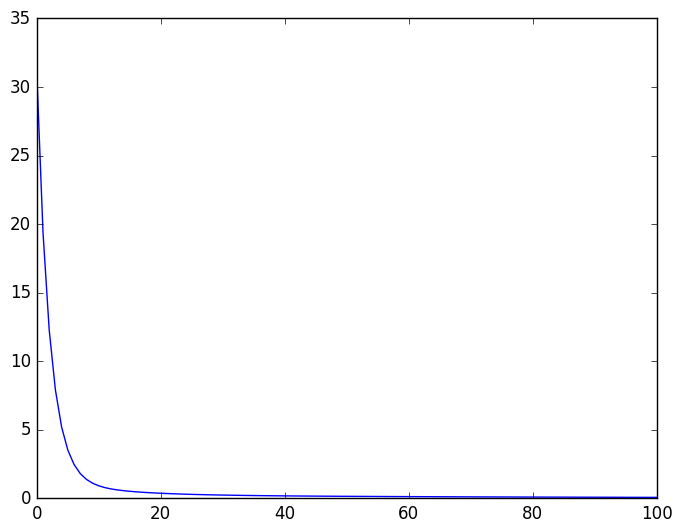

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000194E6860>

In [7]:
# gradient descent

alpha = .01      # small constant step size
w = randn(d)     # start at a random w
fks = Float64[]  # a list to record all the values f(w) we see
push!(fks, f(w)) # record the initial value

# start descending!
for k=1:100 #Question: How to determine stopping criteria?
    w -= alpha*(2X'*X*w - 2X'*y) # take a gradient step
    push!(fks, f(w))             # record its value
end
plot(fks)
# semilogy(fks)
# loglog(fks)